Data Visualization I
1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows
and contains information about the passengers who boarded the
unfortunate Titanic ship. Use the Seaborn library to see if we
can find any patterns in the data.
2. Write a code to check how the price of the ticket (column name:
'fare') for each passenger is distributed by plotting a histogram.
The objective is to predict the value of prices of the house using the
given features.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset("titanic")

In [3]:
# View the first few rows of the dataset
print(df.head())
# Check for missing values
print(df.isnull().sum())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck      

In [4]:
# Data Preprocessing

# Fill missing age values with the mean age
df["age"] = df["age"].fillna(df["age"].mean())
# Fill missing deck values with forward fill
df["deck"] = df["deck"].ffill()
# Drop remaining missing values
df.dropna(inplace=True)

# Verify if there are any missing values left
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


### 1. **Countplot**
**Purpose:** To show the count of each category in a categorical variable.
  
**Example:**
```python
sns.countplot(data=df, x="class", hue="survived")
```

- **What it does:** This plot shows how many passengers are in each class (`class`), divided by whether they survived (`survived`).
- **How to interpret:**
  - The x-axis shows the class (1st, 2nd, or 3rd).
  - The colors represent whether passengers survived (1) or did not survive (0).
  - The y-axis shows the number of passengers in each category.

**Key Takeaway:** Helps you understand the distribution of categories and how they relate to other variables (like survival).

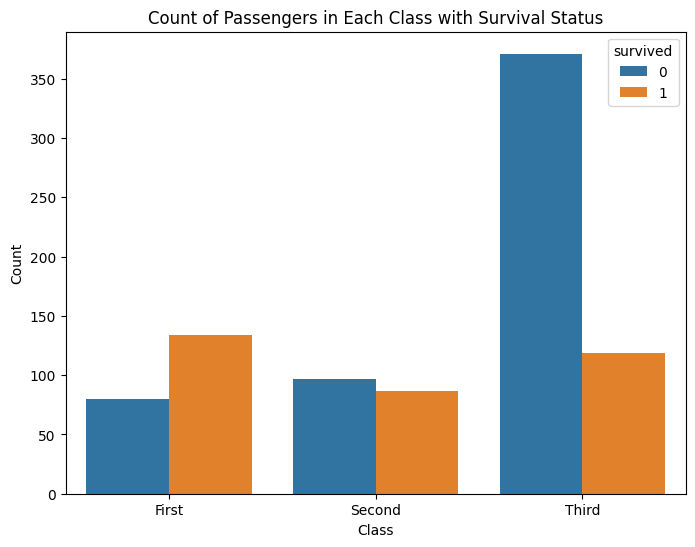

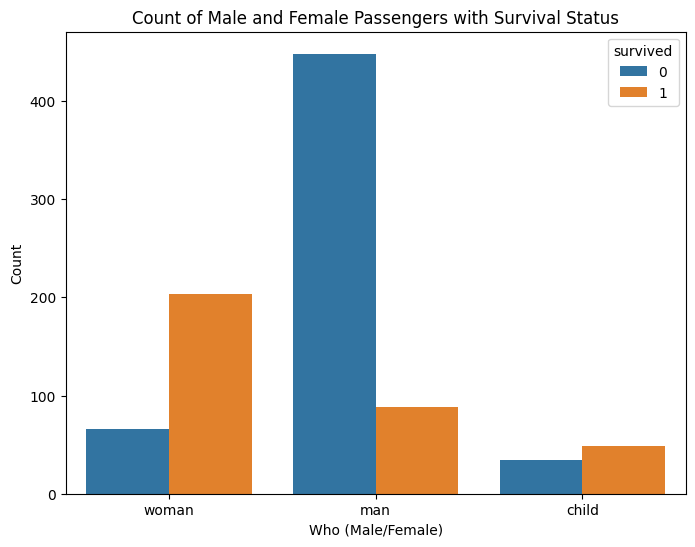

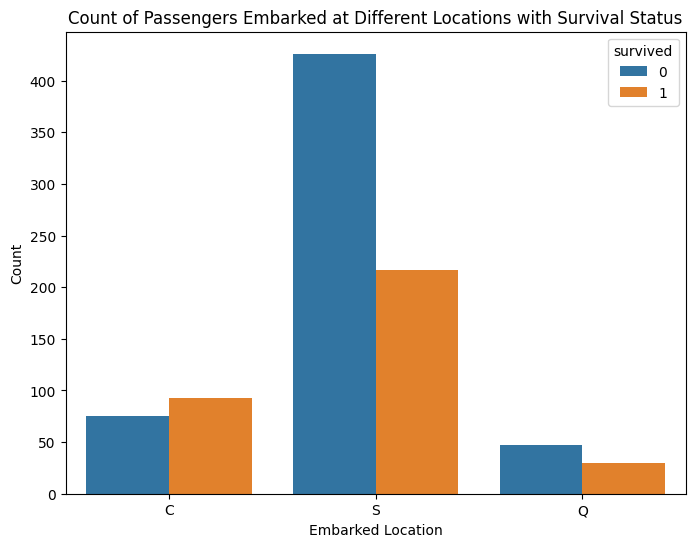

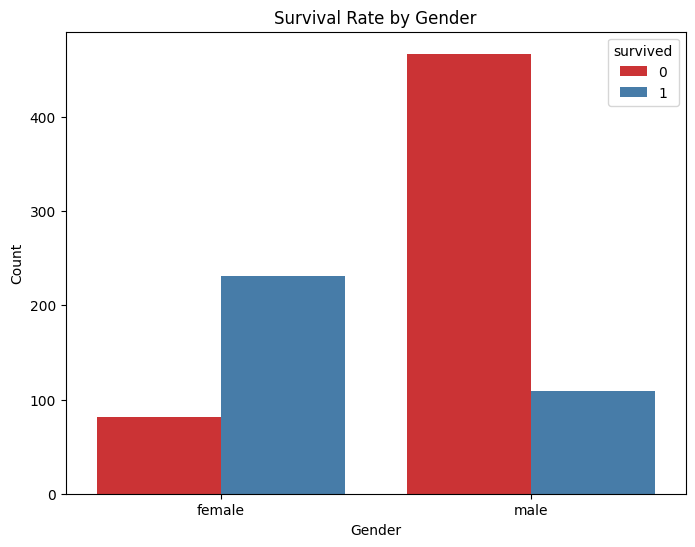

In [5]:
# Data Visualization

# 1. Countplot - Distribution of class and survival status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="class", hue="survived").set_title('Count of Passengers in Each Class with Survival Status')
# plt.title('Count of Passengers in Each Class with Survival Status')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 2. Countplot - Distribution of 'who' and survival status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="who", hue="survived")
plt.title('Count of Male and Female Passengers with Survival Status')
plt.xlabel('Who (Male/Female)')
plt.ylabel('Count')
plt.show()

# 3. Countplot - Distribution of embarkation points and survival status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="embarked", hue="survived")
plt.title('Count of Passengers Embarked at Different Locations with Survival Status')
plt.xlabel('Embarked Location')
plt.ylabel('Count')
plt.show()

# 4. Countplot - Survival rate by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="sex", hue="survived", palette="Set1")
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### 2. **Boxplot**
**Purpose:** To show the distribution of a numerical variable and identify outliers.

**Example:**
```python
sns.boxplot(data=df, x="survived", y="fare")
```

- **What it does:** This plot shows the distribution of fares (`fare`) based on whether passengers survived.
- **How to interpret:**
  - The box shows the middle 50% of the data (from the first quartile to the third quartile).
  - The line inside the box represents the median fare.
  - Outliers (unusual fare values) are shown as points outside the "whiskers."
  - The x-axis shows if a passenger survived (1) or not (0).
  
**Key Takeaway:** Helps you understand the spread and central tendency of fare prices for different survival groups.


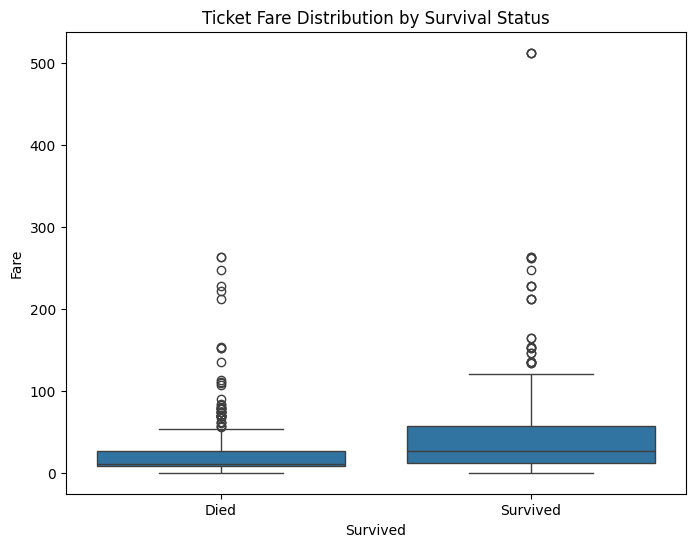

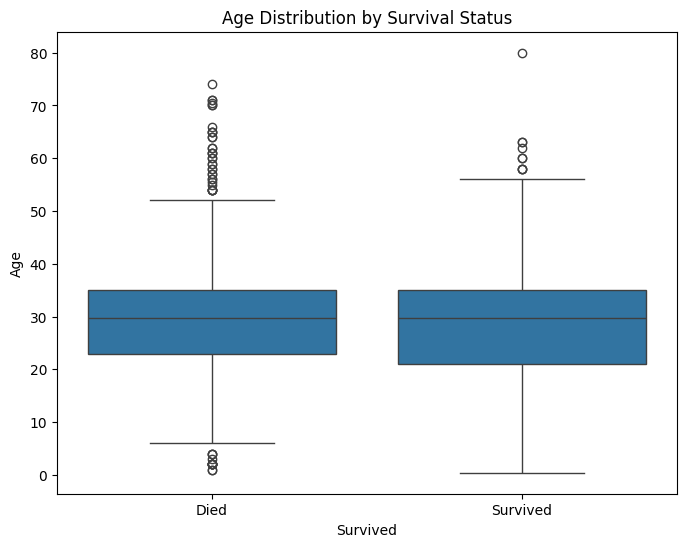

In [6]:
# 5. Boxplot - Fare distribution by survival status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="survived", y="fare")
plt.title('Ticket Fare Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([0, 1], ['Died', 'Survived'])
plt.show()

# 6. Boxplot - Age distribution by survival status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="survived", y="age")
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Died', 'Survived'])
plt.show()



### 3. **Histogram**
**Purpose:** To show how a numerical variable is distributed by grouping data into bins.

**Example:**
```python
sns.histplot(data=df, x="fare", bins=50, kde=True, color='blue')
```

- **What it does:** This plot shows the distribution of fares (`fare`), splitting them into 50 bins and adding a smooth curve (KDE) to show the overall distribution.
- **How to interpret:**
  - The x-axis shows the fare values.
  - The y-axis shows how many passengers paid that fare (or a similar one).
  - The smooth line shows the general shape of the distribution.
  
**Key Takeaway:** Helps you see the distribution of a numerical variable and understand its most common values.


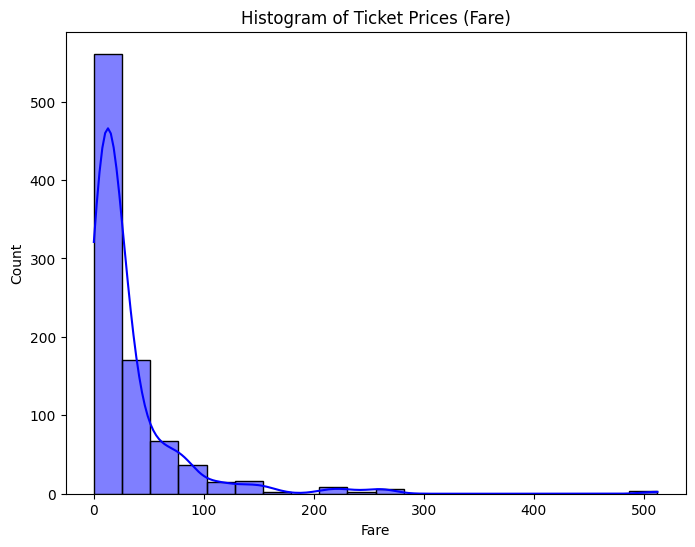

In [7]:
# 7. Histogram - Distribution of 'Fare'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="fare", bins=20, kde=True, color='blue')
plt.title('Histogram of Ticket Prices (Fare)')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

### 4. **Violin Plot**
**Purpose:** To show the distribution and density of a numerical variable for each category.

**Example:**
```python
sns.violinplot(data=df, x="survived", y="fare", palette='Set1')
```

- **What it does:** This plot shows how fares (`fare`) are distributed for both groups (survived and not survived).
- **How to interpret:**
  - The x-axis shows whether a passenger survived (1) or not (0).
  - The width of the "violin" shows where most of the data points (fares) are.
  - The taller part of the violin indicates higher density.
  
**Key Takeaway:** Helps you understand the density and spread of fare values for different survival statuses.


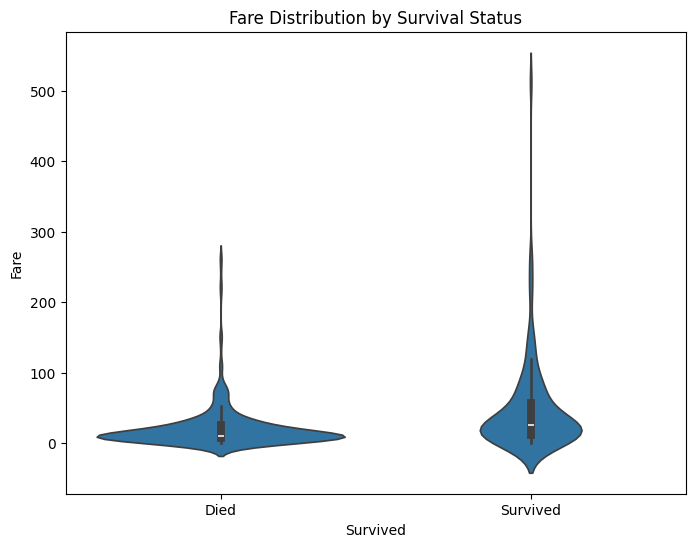

In [13]:
# 8. Violin Plot - Distribution of Fare by Survival Status
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x="survived", y="fare")
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([0, 1], ['Died', 'Survived'])
plt.show()

### 5. **Regplot**
**Purpose:** To show the relationship between two continuous variables and fit a regression line.

**Example:**
```python
sns.regplot(data=df, x="age", y="fare")
```

- **What it does:** This plot shows the relationship between age (`age`) and fare (`fare`), with a regression line that fits the data.
- **How to interpret:**
  - The x-axis shows age.
  - The y-axis shows fare.
  - The line shows the overall trend between the two variables (e.g., whether older passengers tend to pay more).

**Key Takeaway:** Helps you see if two numerical variables have a linear relationship.


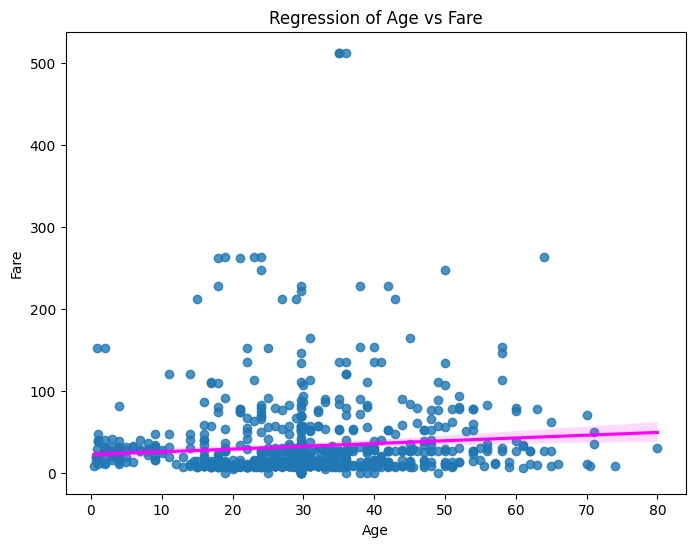

In [18]:
# 9. Regression Plot - Age vs. Fare with survival status
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x="age", y="fare", line_kws={'color': 'magenta'})
plt.title('Regression of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

### 6. **Heatmap**
**Purpose:** To show the correlation between multiple numerical variables using colors.

**Example:**
```python
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
```

- **What it does:** This plot shows the correlation matrix, which tells you how strongly different numerical variables are related to each other.
- **How to interpret:**
  - Each cell shows the correlation between two variables.
  - The colors show the strength of the correlation: red for positive, blue for negative, and yellow for no correlation.
  - The numbers show the exact correlation values.
  
**Key Takeaway:** Helps you understand the relationships between multiple numerical variables (e.g., if `age` and `fare` are strongly correlated).

            age      fare     sibsp     parch
age    1.000000  0.088302 -0.231658 -0.178605
fare   0.088302  1.000000  0.161169  0.217323
sibsp -0.231658  0.161169  1.000000  0.414868
parch -0.178605  0.217323  0.414868  1.000000


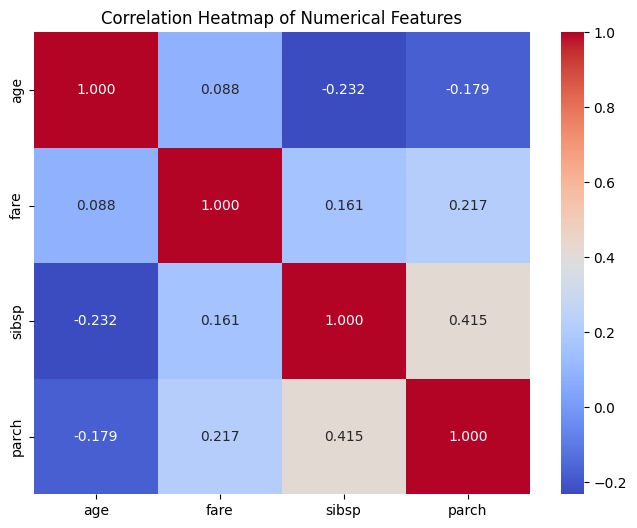

In [8]:
# 10. Heatmap - Correlation between numerical features
numerical_data = df[['age', 'fare', 'sibsp', 'parch']]
corr = numerical_data.corr()
print(corr)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Common Terms in Data Visualization

### **HUE**
- The `hue` parameter in Seaborn is used to color the data points by another categorical variable. It helps differentiate categories within the data.
- **Example**: `sns.countplot(data=df, x="class", hue="survived")` will show different colors for passengers who survived vs. those who did not.

### **KDE (Kernel Density Estimate)**
- A smoother representation of the histogram. It estimates the probability density function of the data, providing a continuous distribution curve.
- **Example**: `sns.histplot(data=df, x="fare", kde=True)` adds a smooth line on top of the histogram to show the distribution of fare values.

### **Regression Line**
- A line that fits the data points in a scatter plot, showing the relationship between two continuous variables. It helps understand the trend (whether they are positively or negatively correlated).
- **Example**: In `sns.regplot(data=df, x="age", y="fare")`, the red line represents the regression line.

### **Outliers**
- Points that are significantly different from the majority of data. They can be visualized using boxplots or scatter plots.
- **Example**: In a boxplot, outliers appear as points beyond the "whiskers" of the box.

### **Correlation**
- The degree to which two variables move in relation to each other. It can be visualized using a heatmap to understand the relationships between numerical variables.
- **Example**: A correlation value of 1 means a perfect positive relationship, while -1 means a perfect negative relationship.
